# Question: Write Python code to load a datartset using the pandas library and display the first five rows.

In [19]:
import pandas as pd
data = pd.read_csv("D:/Shiva Data Science/Main DS/Files/breast_cancer.csv", encoding='latin1')
data.head(5)

,Unnamed: 0,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,5,1,1,1,2,1,3,1,1,benign
1,2,5,4,4,5,7,10,3,2,1,benign
2,3,3,1,1,1,2,2,3,1,1,benign
3,4,6,8,8,1,3,4,3,7,1,benign
4,5,4,1,1,3,2,1,3,1,1,benign


In [20]:
data.isnull().sum()

Unnamed: 0         0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [104]:
X = data.drop("Class",axis=1)

In [105]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
Y = LabelEncoder.fit_transform(data["Class"])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [108]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [109]:
Y_pred = model.predict(X_test)

In [110]:
Accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy_Score-",Accuracy.round(3)*100,"%")

Accuracy_Score- 95.6 %


# Question: Write Python code to perform one-hot encoding on a categorical variable 'Color' in a pandas DataFrame.

In [274]:
One_Hot_encoder_data = pd.get_dummies(data ,columns=["Class"])
One_Hot_encoder_data.head(5)

,Unnamed: 0,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_benign,Class_malignant
0,1,5,1,1,1,2,1,3,1,1,1,0
1,2,5,4,4,5,7,10,3,2,1,1,0
2,3,3,1,1,1,2,2,3,1,1,1,0
3,4,6,8,8,1,3,4,3,7,1,1,0
4,5,4,1,1,3,2,1,3,1,1,1,0


## Question: Given a dataset of house prices, implement a decision tree regression model using scikit-learn and evaluate its performance using Mean Squared Error (MSE).

In [275]:
Data = pd.read_csv("D:/Shiva Data Science/Main DS/Files/Company_incentives.csv")
Data.head(5)

,Age,Education,MaritalStatus,Race,Gender,Country,Incentives
0,39,Bachelors,Never-married,White,Male,United-States,77516
1,50,Bachelors,Married,White,Male,United-States,83311
2,38,HS-grad,Divorced,White,Male,United-States,215646
3,28,Bachelors,Married,Black,Female,Cuba,338409
4,37,Masters,Married,White,Female,United-States,284582


In [276]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

Col_Names  = ["Education","MaritalStatus","Race","Gender","Country"]

for Col in Col_Names:
    Data[Col] = LabelEncoder.fit_transform(Data[Col])

In [277]:
x = Data.drop("Incentives",axis=1)
x.head(5)

,Age,Education,MaritalStatus,Race,Gender,Country
0,39,2,1,4,1,20
1,50,2,4,4,1,20
2,38,4,0,4,1,20
3,28,2,4,2,0,3
4,37,5,4,4,0,20


In [278]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x  = MM.fit_transform(x)
x = pd.DataFrame(x)
x.head(5)

,0,1,2,3,4,5
0,0.484848,0.250,0.25,1.0,1.0,1.00
1,0.818182,0.250,1.00,1.0,1.0,1.00
2,0.454545,0.500,0.00,1.0,1.0,1.00
3,0.151515,0.250,1.00,0.5,0.0,0.15
4,0.424242,0.625,1.00,1.0,0.0,1.00


In [279]:
y = Data["Incentives"]
y.head(5)

0     77516
1     83311
2    215646
3    338409
4    284582
Name: Incentives, dtype: int64

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [281]:
import numpy as np
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Rmse =np.sqrt(mean_squared_error(Y_test,Y_pred))
Rmse.round(2)

129046.78

### Question: Write Python code to perform K-Means clustering on a dataset using the scikit-learn library.

In [119]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(x)
Kmean_labels =Kmeans.labels_
x["Cluster"]= pd.DataFrame(Kmean_labels, columns=["Cluster"])
x.head(5)                             

C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,0,1,2,3,4,5,Cluster
0,0.484848,0.250,0.25,1.0,1.0,1.00,0
1,0.818182,0.250,1.00,1.0,1.0,1.00,2
2,0.454545,0.500,0.00,1.0,1.0,1.00,0
3,0.151515,0.250,1.00,0.5,0.0,0.15,1
4,0.424242,0.625,1.00,1.0,0.0,1.00,1


# Question: Implement k-nearest neighbors (KNN) classification in Python using the scikit-learn library. Provide code and an example dataset.

In [120]:
# Example dataset
xx = [[1, 2], [2, 3], [3, 4], [4, 5]]
yy = [0, 1, 0, 1]

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
model = knn.fit(xx,yy)

y_pred = model.predict([[6, 3]])
y_pred

array([1])

### Question: Write Python code to perform stratified sampling on a dataset for a classification problem. Why is stratified sampling important?

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42 )
X_train,X_test,Y_train,Y_test

(            0      1     2     3    4    5  Cluster
 357  0.424242  1.000  1.00  1.00  1.0  1.0        2
 647  0.242424  0.000  0.00  0.00  0.0  1.0        1
 291  0.000000  0.500  0.25  1.00  1.0  0.2        0
 420  0.121212  0.250  0.25  1.00  0.0  1.0        1
 177  0.575758  0.500  1.00  0.25  1.0  0.0        2
 ..        ...    ...   ...   ...  ...  ...      ...
 71   0.727273  0.625  0.25  1.00  0.0  1.0        1
 106  0.333333  0.500  0.25  1.00  0.0  1.0        1
 270  0.666667  1.000  0.00  1.00  0.0  1.0        1
 435  0.212121  0.250  1.00  0.50  0.0  1.0        1
 102  0.242424  0.500  0.25  0.50  0.0  1.0        1
 
 [488 rows x 7 columns],
             0      1     2     3    4    5  Cluster
 158  0.242424  1.000  1.00  1.00  1.0  1.0        2
 499  0.969697  1.000  0.00  0.25  0.0  1.0        1
 396  0.393939  0.000  0.00  1.00  0.0  1.0        1
 155  0.818182  0.000  0.00  1.00  0.0  1.0        1
 321  0.787879  0.625  1.00  1.00  1.0  1.0        2
 ..        ...    .

In [123]:
Date_data = pd.DataFrame({
    'datetime_column': ['2023-08-28 10:15:00', '2023-08-28 15:30:00', '2023-08-29 09:45:00']})
Date_data["datetime_column"] = pd.to_datetime(Date_data["datetime_column"])

In [124]:
Date_data["Day_of_week"] = Date_data["datetime_column"].dt.weekofyear
Date_data["hour"]= Date_data["datetime_column"].dt.hour
Date_data

C:\Users\91879\AppData\Local\Temp\ipykernel_6880\1172808793.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Date_data["Day_of_week"] = Date_data["datetime_column"].dt.weekofyear


,datetime_column,Day_of_week,hour
0,2023-08-28 10:15:00,35,10
1,2023-08-28 15:30:00,35,15
2,2023-08-29 09:45:00,35,9


# Question: In a dataset of customer reviews, you want to extract sentiment as a feature. Explain how you can perform sentiment analysis using Python, and provide an example of how to calculate sentiment scores for reviews.

In [125]:
from textblob import TextBlob

Review = "I love this product, Its very good"

sentiment = TextBlob(Review).sentiment

print("Polarity: ",sentiment.polarity)
print("Subjectivity: ",sentiment.subjectivity)

Polarity:  0.705
Subjectivity:  0.6900000000000001


# Question: Implement a simple linear regression model in Python using the scikit-learn library. Provide code and an example dataset.

In [126]:
from sklearn.linear_model import LinearRegression 

x = Data[["Age"]]
y = Data["Incentives"]

LR = LinearRegression()

model = LR.fit(x,y)
y_pred = model.predict([[88]])
y_pred


C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([161038.08622702])

# Question: You are working with a time-series dataset. Explain the concept of rolling statistics and provide an example of how to calculate a rolling mean for a time-series.

In [127]:
# # Sample time-series data
# data = pd.DataFrame({'value': [10, 15, 20, 25, 30, 35, 40]})

# data["Rolling_mean"] = data["value"].rolling(window=3).mean()

# Rolling_mean
# data

In [133]:
length = float(input("length of rectangel: "))

width = float(input("width of rectangle: "))

area = length* width

print("Area of rectangle: ", area)

length of rectangel: 56
width of rectangle: 45
Area of rectangle:  2520.0


In [134]:
number = int(input("Enter a number: "))

if number % 2 == 0:
    print("Number is even")
else:
    print("Number is odd")

Enter a number: 45
Number is odd


In [135]:

Numbers = list(range(1,11))

for number in Numbers:
    print(number)

1
2
3
4
5
6
7
8
9
10


In [136]:
def factorial(n):
    if n==0 or n==1:
        return 1
    else:
        return n * factorial(n-1)
    
print (factorial(5))

120


In [137]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [138]:
def prime_no(n):
    for i in range (2,int(n**0.5)+1):
        if n % i == 0:
            return False
    return True   

Primes = []
for i in range(2,101):
    if prime_no(i):
        Primes.append(i)

print(Primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [139]:
def is_prime(n):
  """Returns True if n is a prime number, False otherwise."""
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True


primes = []
for i in range(2, 101):
  if is_prime(i):
    primes.append(i)

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [140]:
age = 25
print("Iam",age,"years old")

Iam 25 years old


In [141]:
age = 24
print("Iam",age,"years old")

Iam 24 years old


In [143]:
#convert km to miles

km = float(input("Type the no. of km: "))
miles = km / 1.609344
print(km, "km = ", round(miles,3) ,"miles")

Type the no. of km: 456
456.0 km =  283.345 miles


In [38]:

myString = "Some text"
type(myString)

str

In [39]:
myString = 'he said "meet me"'

print(myString)

he said "meet me"


In [40]:
print(myString[0])
print(myString[-1])

h
"


In [41]:
len(myString)

17

In [42]:
myString = "IND784874387783"
myString[0:3]

'IND'

In [43]:
myString = "784874387783IND"
myString[-3:]
print(myString[-8:])

87783IND


In [44]:
#Concatenate
"Hello"+ " "+ "world"

'Hello world'

In [45]:
"user-" + str(22)

'user-22'

In [46]:
num1 = 11
num2 = 77
print(type(num1))

result = num1 / num2
print(result)
print(type(result))

<class 'int'>
0.14285714285714285
<class 'float'>


In [47]:
import math
math.factorial(num1)

39916800

In [48]:
math.ceil(result)

1

# Lists

In [49]:

fruits = ["apple", "banana", "cherry","mango"]
type(fruits)

list

In [50]:
len(fruits)

4

In [51]:
fruits[0]

'apple'

In [52]:
fruits[-1]

'mango'

In [53]:
#  mutable
fruits[-1] = "kiwi"
fruits

['apple', 'banana', 'cherry', 'kiwi']

In [54]:
fruits.append("kiwi")
fruits

['apple', 'banana', 'cherry', 'kiwi', 'kiwi']

In [55]:
fruits.pop()
fruits

['apple', 'banana', 'cherry', 'kiwi']

In [56]:
fruits.pop(2)
fruits

['apple', 'banana', 'kiwi']

In [57]:
fruits.insert(0, "mango")
fruits

['mango', 'apple', 'banana', 'kiwi']

In [58]:
fruits.remove("kiwi")
fruits

['mango', 'apple', 'banana']

In [59]:
fruits2 =["banana","guava"]
fruits2+fruits

['banana', 'guava', 'mango', 'apple', 'banana']

In [60]:
#Excercise

people_names = ["John Smith", "Mary Johnson", "Robert Davis", "Lisa Wilson", "Michael Lee", "Sarah Miller", "David Anderson", "Emily Taylor", "James Brown", "Jennifer Evans"]

user = input("Type your name: ")

people_names.append(user)
print("Here's the list: ", people_names)


Type your name: 
Here's the list:  ['John Smith', 'Mary Johnson', 'Robert Davis', 'Lisa Wilson', 'Michael Lee', 'Sarah Miller', 'David Anderson', 'Emily Taylor', 'James Brown', 'Jennifer Evans', '']


# Tuples

In [61]:
T = ("John", 25, "New York")
type(T)

tuple

In [62]:
T[0]

'John'

In [63]:
T

('John', 25, 'New York')

In [64]:
# T.add("kiwi")
# T 
# immutable

In [65]:
#excercise
months = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
Birthday = input("Type your birthday in the format DD-MM-YYYY")

index = int (Birthday[3:5])-1
bd_month = months[index]

print("You were born in ", bd_month)


Type your birthday in the format DD-MM-YYYY12-06-1998
You were born in  June


# Dictionary

In [66]:
person = {"first_name": "John","last_name": "Doe","age": 30,"city": "New York"}

In [67]:
person["dob"] = "14-01-1998"
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998'}

In [68]:
person["childrens"] = ["Ana","pan"]
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan']}

In [69]:
person["childrens"].append("jan")
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan', 'jan']}

In [70]:
person.get("childrens","invalid property")

['Ana', 'pan', 'jan']

In [71]:
person.get("Country","invalid property")

'invalid property'

In [72]:
person["first_name"]

'John'

In [73]:
keys = list(person.keys())
keys

['first_name', 'last_name', 'age', 'city', 'dob', 'childrens']

In [74]:
values = list(person.values())
values

['John', 'Doe', 30, 'New York', '14-01-1998', ['Ana', 'pan', 'jan']]

In [75]:
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan', 'jan']}

In [76]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? age
30


In [77]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? Age
That information is not available


In [78]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? First_name
That information is not available


In [79]:
key = input("What inforemation you want to know about the person? ").lower()

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? First_name
John


In [80]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? Age
That information is not available


In [81]:
key = input("What inforemation you want to know about the person? ").lower()

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? Age
30


In [82]:
person.clear()
person

{}

# Booleans

In [83]:
Myboolean = True
type(Myboolean)

bool

In [84]:
num1 = 15
num2 = 19

In [85]:
num1 > num2

False

In [86]:
num1 < num2

True

In [87]:
num1 == num2

False

In [88]:
num1 != num2

True

In [89]:
num1 >= num2

False

In [90]:
num1 <= num2

True

In [91]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
print("this is out of the if structure")

Type the first number: 4
Type the first number: 2
4.0 is greater than  2.0
this is out of the if structure


In [92]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
print("this is out of the if structure")

Type the first number: 2
Type the first number: 4
this is out of the if structure


In [93]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
elif(num1 == num2):
    print(num1,"is equal to ",num2)
else:
    print(num1,"is less than ",num2)

Type the first number: 4
Type the first number: 2
4.0 is greater than  2.0


In [94]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
elif(num1 == num2):
    print(num1,"is equal to ",num2)
else:
    print(num1,"is less than ",num2)

Type the first number: 8
Type the first number: 4
8.0 is greater than  4.0


In [96]:
my_age = 34

user_age = int(input("Type your age: "))

if (user_age > my_age):
    print("You are older than me")
elif (user_age == my_age):
    print("we are same age")
else:
    print("you are younge than me")

Type your age: 45
You are older than me


In [97]:
my_age = 34

user_age = int(input("Type your age: "))

if (user_age > my_age):
    print("You are older than me")
elif (user_age == my_age):
    print("we are same age")
else:
    print("you are younge than me")

Type your age: 22
you are younge than me


In [150]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60):
    if(attendance >= 0.8):
        print("You have been approved.")
    else:
        print("You are not approved due to an attenadnce rate lower than the 80%.")
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")

Type your grade in the first test: 45
Type your grade in the second test: 89
Type your grade in the third test: 94
Type your number of absences: 5
Type your total number of classes: 56
Average grade:  76.0
Attendance rate:  91.07
You have been approved.


In [151]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60):
    if(attendance >= 0.8):
        print("You have been approved.")
    else:
        print("You are not approved due to an attenadnce rate lower than the 80%.")
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")

Type your grade in the first test: 56
Type your grade in the second test: 69
Type your grade in the third test: 85
Type your number of absences: 54
Type your total number of classes: 85
Average grade:  70.0
Attendance rate:  36.47
You are not approved due to an attenadnce rate lower than the 80%.


# And - or Operators

In [152]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 60 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 66
Type your grade in the second test: 95
Type your grade in the third test: 84
Type your number of absences: 55
Type your total number of classes: 150
Average grade:  81.67
Attendance rate:  63.33
You are not approved due to an attenadnce rate lower than the 80%.


In [153]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 60 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 58
Type your grade in the second test: 58
Type your grade in the third test: 54
Type your number of absences: 54
Type your total number of classes: 99
Average grade:  56.67
Attendance rate:  45.45
You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.


# #Conditions

In [154]:
print("This program claculate your body mass index.")

weight = float(input("Type your weight in kg(ex. 70.5): " ))
height = float(input("Type your height in meters(ex. 1.75): " ))

bmi = weight / (height**2)

print("your bmi is: ", round(bmi,2))

if (bmi <= 18.5):
    classification = "Under weight"
elif (bmi > 18.5 and bmi <= 24.9):
    classification = "Normal weight"
elif (bmi > 24.9 and bmi < 29.9):
    classification = "Over weight"
else:
    classification = "Obesity"
    
print("The classification of bmi is: ", classification)

This program claculate your body mass index.
Type your weight in kg(ex. 70.5): 70
Type your height in meters(ex. 1.75): 1.7
your bmi is:  24.22
The classification of bmi is:  Normal weight


In [155]:
print("This program claculate your body mass index.")

weight = float(input("Type your weight in kg(ex. 70.5): " ))
height = float(input("Type your height in meters(ex. 1.75): " ))

bmi = weight / (height**2)

print("your bmi is: ", round(bmi,2))

if (bmi <= 18.5):
    classification = "Under weight"
elif (bmi > 18.5 and bmi <= 24.9):
    classification = "Normal weight"
elif (bmi > 24.9 and bmi < 29.9):
    classification = "Over weight"
else:
    classification = "Obesity"
    
print("The classification of bmi is: ", classification)

This program claculate your body mass index.
Type your weight in kg(ex. 70.5): 66
Type your height in meters(ex. 1.75): 1.66
your bmi is:  23.95
The classification of bmi is:  Normal weight


# While Loops

In [157]:

people = []

while len(people) < 5:
    person = input("Type the name of the person: ")
    people.append(person)
print(people)


Type the name of the person: ram
Type the name of the person: shiva
Type the name of the person: pavan
Type the name of the person: srinath
Type the name of the person: mani
['ram', 'shiva', 'pavan', 'srinath', 'mani']


In [164]:
import random

number = random.randint(0,10)

guess = int(input("Iam thinking about a number between zero and ten can you guess: "))

while True:
    if guess == number:
        break
    else:
        guess = int(input("Nope, Try again: "))

print("You guessed it. I was thinking about: ", number)

Iam thinking about a number between zero and ten can you guess: 1
Nope, Try again: 2
Nope, Try again: 2
Nope, Try again: 3
Nope, Try again: 6
You guessed it. I was thinking about:  6


In [165]:
number = 8

guess = int(input("Iam thinking about a number between zero and ten can you guess: "))

while True:
    if guess == number:
        break
    else:
        guess = int(input("Nope, Try again: "))

print("You guessed it. I was thinking about: ", number)

Iam thinking about a number between zero and ten can you guess: 5
Nope, Try again: 6
Nope, Try again: 3
Nope, Try again: 8
You guessed it. I was thinking about:  8


# For Loops

In [167]:
months = ["January", "February", "March", ""," ","April", "May", "June", "July", "August", " ","September", "October", "November", "December"]

for month in months:
    print(month)

January
February
March

 
April
May
June
July
August
 
September
October
November
December


In [177]:
for month in months:
    if month == "":
        continue
    else:
        print(month)

January
February
March
 
April
May
June
July
August
 
September
October
November
December


In [178]:
for month in months:
    if month == "":
        continue
    elif month == " ":
        continue
    else:
        print(month)

January
February
March
April
May
June
July
August
September
October
November
December


In [180]:
month = "January"

for char in month:
    print(char)

J
a
n
u
a
r
y


In [181]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [182]:
dict = {"name": "Alice", "age": 30, "city": "San Francisco"}

for key in dict:
    print(key," : ", dict[key])

name  :  Alice
age  :  30
city  :  San Francisco


In [184]:
posts = {"shiva" : ["hi", "iam", "you", "go"], "pavan" : ["bye", "come", "where", "software"]}

for person in posts:
    print("Post by : ",person)
    for post in posts[person]:
        print(post)

Post by :  shiva
hi
iam
you
go
Post by :  pavan
bye
come
where
software


In [187]:
import random

people = []

for x in range(0,5):
    person = input("Type the name of the person: ")
    people. append(person)
    
index = random.randint(0,4)

random_person = people[index]

print("\npicking a random person: ", random_person)

Type the name of the person: shiva
Type the name of the person: mani
Type the name of the person: pavan
Type the name of the person: ram
Type the name of the person: charan

picking a random person:  mani


In [191]:
import random

colors = ["red", "green", "blue", "yellow", "purple", "orange"]

while True:
    color = colors[random.randint(0,len(colors)-1)]
    guess = input("i'm thinking about a color, canyou guess it: ")
    
    while True:
        if (color == guess.lower()):
            break
        else:
            guess = input("Nope, try again: ")
    print("You guessed it, I was thinking about: ", color)
    
    play_again = input("Lets play again? type 'no' to quit.")
    if play_again.lower() == "no":
        break
print("it was fun, thanks for playing")

i'm thinking about a color, canyou guess it: red
You guessed it, I was thinking about:  red
Lets play again? type 'no' to quit.blue
i'm thinking about a color, canyou guess it: yellow
Nope, try again: red
Nope, try again: green
Nope, try again: orange
Nope, try again: yellow
Nope, try again: blue
You guessed it, I was thinking about:  blue
Lets play again? type 'no' to quit.no
it was fun, thanks for playing


# Data Validation

In [195]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True


Type your grade in the first test: 4
Type your grade in the second test: 66
Grade should be in between 0 and 10
Type your grade in the second test: 5


In [197]:
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than o")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

Type total no of classes : 0
Total number of classes should more than o
Type total no of classes : 66
Number of absences : -5
Absences should not less than zero and not greater than total classes
Number of absences : 89
Absences should not less than zero and not greater than total classes
Number of absences : 15


In [208]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 6
Type your grade in the second test: 9
Type total no of classes : 55
Number of absences : 69
Absences should not less than zero and not greater than total classes
Number of absences : 4
Average grade:  7.5
Attendance rate:  92.73
You have been approved.


In [207]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 9
Type your grade in the second test: 6
Type total no of classes : 66
Number of absences : 88
Absences should not less than zero and not greater than total classes
Number of absences : 56
Average grade:  7.5
Attendance rate:  15.15
You are not approved due to an attenadnce rate lower than the 80%.


# Error handling

In [209]:
number = input("type a number:")

try:
    number = float(number)
    print("the number is: ", number)
except:
    print("Invalid number")

type a number:shiva
Invalid number


In [210]:
number = input("type a number:")

try:
    number = float(number)
    print("the number is: ", number)
except:
    print("Invalid number")

type a number:45
the number is:  45.0


In [225]:
prime_numbers = []

for i in range(2, 100):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


25

In [231]:
data_valid = False
while data_valid == False:
    grade1 = input("Type your grade in the first test: ")
    try:
        grade1 = float(grade1)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = input("Type your grade in the second test: ")
    try:
        grade2 = float(grade2)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = input("Type total no of classes : ")
    try:
        total_classes = int(total_classes)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = input("Number of absences : ")
    try:
        obsences = int(obsences)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: shiva
Invalid input, only numbers are accepted. Decimal should be separated by dot.
Type your grade in the first test: 85
Grade should be in between 0 and 10
Type your grade in the first test: 6
Type your grade in the second test: 9
Type total no of classes : Na
Invalid input, only numbers are accepted. Decimal should be separated by dot.
Type total no of classes : 55
Number of absences : 96
Absences should not less than zero and not greater than total classes
Number of absences : NA
Invalid input, only numbers are accepted. Decimal should be separated by dot.
Number of absences : 15
Average grade:  7.5
Attendance rate:  72.73
You are not approved due to an attenadnce rate lower than the 80%.


In [232]:
data_valid = False
while data_valid == False:
    grade1 = input("Type your grade in the first test: ")
    try:
        grade1 = float(grade1)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = input("Type your grade in the second test: ")
    try:
        grade2 = float(grade2)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = input("Type total no of classes : ")
    try:
        total_classes = int(total_classes)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = input("Number of absences : ")
    try:
        obsences = int(obsences)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 8
Type your grade in the second test: 9
Type total no of classes : 45
Number of absences : 2
Average grade:  8.5
Attendance rate:  95.56
You have been approved.


# Print Prime numbers

In [228]:
prime_numbers = []

for i in range(2, 1000):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


168

In [229]:
prime_numbers = []

for i in range(2, 10):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7]


4

# Functions

In [236]:
print(5)

5


In [237]:
round(6545.655)

6546

In [238]:
def say_hello():
    print("Hellow")
say_hello()

Hellow


In [244]:
def say_hello(person):
    print("Hello " + person + ", how are you doing?")
    
say_hello("shiva")

Hello shiva, how are you doing?


In [245]:
say_hello("Pawan")

Hello Pawan, how are you doing?


In [248]:
def fahr2celsius(fahr):
    celsius = (5 * (fahr - 32)) / 9
    return celsius
print("Celsius: ", round(fahr2celsius(200),2) )
print("Kelvin: ", round(fahr2celsius(200)+273.5,2) )

Celsius:  93.33
Kelvin:  366.83


In [249]:
def say_hello(person1, person2):
    print("Hello " + person1 + ", how are you doing? " + person2 + " is waiting for you")
    
say_hello("shiva", "pawan")

Hello shiva, how are you doing? pawan is waiting for you


In [250]:
def say_hello(person1, person2 = "Hero"):
    print("Hello " + person1 + ", how are you doing? " + person2 + " is waiting for you")
    
say_hello("shiva")

Hello shiva, how are you doing? Hero is waiting for you


# Modules

# Time

In [251]:
import time as t

In [258]:
time_now = t.localtime()

In [263]:
print("transaction done at ", str(time_now.tm_hour) + "h" + str(time_now.tm_min) + "m") 

transaction done at  1h55m


In [264]:
t.time()

1697401573.7849748

In [272]:
time_now = t.time()
delivery_time = time_now + (86400 * 7)
print(delivery_time)

t.localtime(delivery_time)

1698007580.6094124


time.struct_time(tm_year=2023, tm_mon=10, tm_mday=23, tm_hour=2, tm_min=16, tm_sec=20, tm_wday=0, tm_yday=296, tm_isdst=0)

In [271]:
t.sleep(5)

# Matplotlib

In [282]:
import matplotlib.pyplot as plt

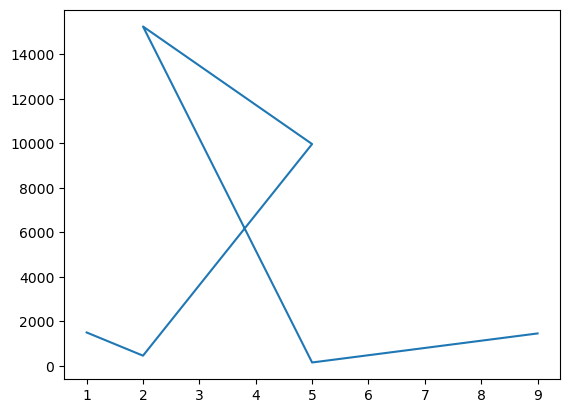

In [283]:
x = [1,2,5,2,5,9]
y = [1500,458,9964,15245,152,1456]

plt.plot(x,y)

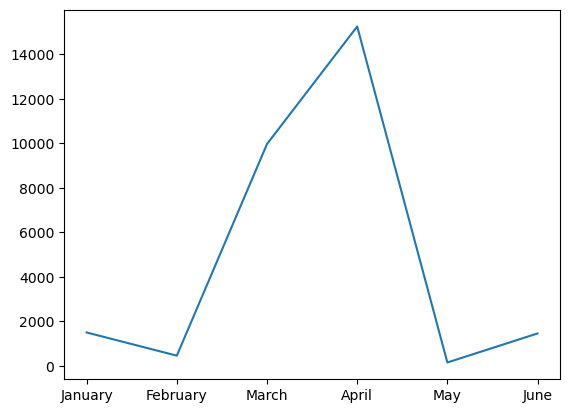

In [284]:
months = ("January", "February", "March", "April", "May", "June")
plt.plot(months,y)

Text(0.5, 1.0, 'Heading')

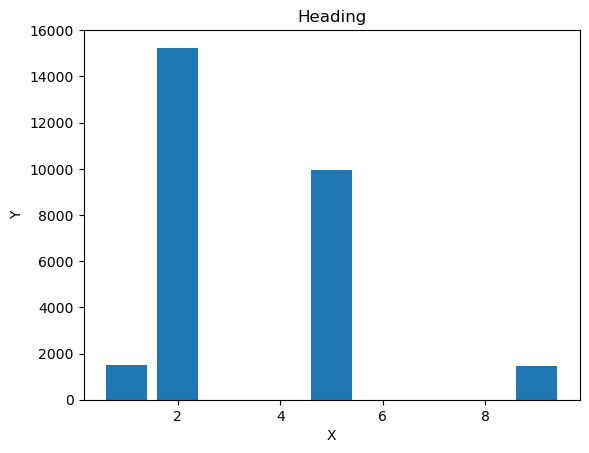

In [287]:
plt.bar(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Heading")

# Time & Pyplot

In [288]:
import matplotlib.pyplot as plt
import time as t

This program will help you to type faster
Please enter to continue: 
Type the word: programming
Type the word: programming3
Type the word: programming
Type the word: programming
Type the word: programming
You made 1mistake(s).
Now let's see your evalution


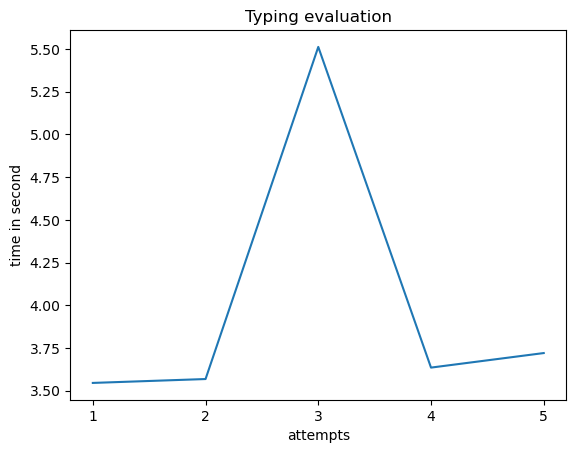

In [295]:
times = []
mistakes = 0 

print("This program will help you to type faster")
input("Please enter to continue: ")

while len(times) < 5:
    start = t.time()
    word = input("Type the word: ")
    end = t.time()
    time_elapsed = end - start
    
    times.append(time_elapsed)
    
    if (word.lower() != "programming"):
        mistakes += 1
        
print("You made " + str(mistakes) + "mistake(s).")
print("Now let's see your evalution")
t.sleep(3)


x = [1, 2, 3, 4, 5]
y = times

legend = ["1", "2", "3", "4", "5"]
plt.xticks(x,legend)

plt.ylabel("time in second")
plt.xlabel("attempts")
plt.title("Typing evaluation")

plt.plot(x,y)
plt.show()

# HTTP Request

In [3]:
import requests
r = requests.get("https://www.google.com")
r.status_code

200

In [5]:
r.headers

{'Date': 'Sun, 15 Oct 2023 22:43:37 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-EF1da9A5yfmXq87eYW4I-Q' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-10-15-22; expires=Tue, 14-Nov-2023 22:43:37 GMT; path=/; domain=.google.com; Secure, AEC=Ackid1QlFqi__tBcC2LcHCgqSx3VDqu9P6RGfn-gbuMTVRf30K9Ehcvqen0; expires=Fri, 12-Apr-2024 22:43:37 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=hQ1jcFC8lS1qdUjtUvn13DUc8LrOGpFU48N39rf6_zpUtKy5vS7Id66fiPEXGuI052j37cS_tNZBkPSnc2cC_GF-ez-xCEypUMYJKoSJHZ6cKtasDlKZ_t1B0ytlxq3GosTnN1baNcNDcJoz

In [6]:
r.headers["Date"]

'Sun, 15 Oct 2023 22:43:37 GMT'

In [4]:
r.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-IN"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="EF1da9A5yfmXq87eYW4I-Q">(function(){var _g={kEI:\'GWssZc66F9H4seMP76-JqAk\',kEXPI:\'0,1365468,206,4804,2316,383,246,5,1129120,1826,1195922,143,380600,16114,28684,22431,1361,283,12037,4745,12834,4998,17075,35733,3596,1987,2891,12360,76795,230,1014,1,16916,2652,4,32894,26723,4437,22598,6639,7596,1,42154,2,16737,23024,5679,1021,31122,4568,6252,23425,1251,33064,2,2,1,6959,19673,8155,23351,873,19633,7,1355,567,9779,12414,30045,3142,17057,20136,14,82,7651,5682,6873,4069,4308,8238,10722,281,5122,3030,11151,4665,1804,7734,25363,2171,5250,8199,8840,867,6059,7594,3339,7768,146,5769,12385,3592,5209124,906,109,2,195,623,5994146,98,2803117,3311,141,795,28699,844,3,8,2,40,31,23940941,396,182,4043528,1007,15665,40903,

# File Handling

In [6]:
f = open("untitled.txt")
print(f.read())

information alert
Schedule learning time
Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.



In [9]:
f = open("untitled.txt", "w")   #replace
f.write("information alert")

f = open("untitled.txt")
print(f.read())

information alert


In [12]:
f = open("untitled.txt", "a")   #append
f.write("\nSchedule learning time \nLearning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.")

f = open("untitled.txt")
print(f.read())

information alert
 Schedule learning time 
 Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.
Schedule learning time 
Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.


In [16]:
f = open("untitled2.txt", "x") # create file
f

<_io.TextIOWrapper name='untitled2.txt' mode='x' encoding='cp1252'>

In [17]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Reading excel sheets

In [28]:
import pandas as pd
file = pd.ExcelFile("C://Users//91879//Downloads//sales.xlsx")
file

In [29]:
print(file.sheet_names)

['sales', 'customers']


In [61]:
sales = file.parse("sales")
sales

,Date,Customer,Invoice,Amount
0,2018-12-01,Steel Brothers Inc.,98,1340
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
3,2018-12-18,Steel Brothers Inc.,101,977
4,2018-12-21,Steel & Iron LLC,102,3400


In [62]:
type(sales)

pandas.core.frame.DataFrame

In [63]:
print(sales.Date)

0   2018-12-01
1   2018-12-10
2   2018-12-12
3   2018-12-18
4   2018-12-21
Name: Date, dtype: datetime64[ns]


In [64]:
sales.Amount.sum()

10517

In [65]:
sales.loc[0]

Date        2018-12-01 00:00:00
Customer    Steel Brothers Inc.
Invoice                      98
Amount                     1340
Name: 0, dtype: object

In [66]:
sales.loc[0 , "Amount"]

1340

In [67]:
sales.set_index("Amount", inplace=True)
sales.loc[1340]

Date        2018-12-01 00:00:00
Customer    Steel Brothers Inc.
Invoice                      98
Name: 1340, dtype: object

In [69]:
sales.set_index("Customer", inplace=True)
sales.loc["MMC Inc."]

,Date,Invoice
Customer,,
MMC Inc.,2018-12-10,99
MMC Inc.,2018-12-12,100


In [70]:
sales.reset_index()

,Customer,Date,Invoice
0,Steel Brothers Inc.,2018-12-01,98
1,MMC Inc.,2018-12-10,99
2,MMC Inc.,2018-12-12,100
3,Steel Brothers Inc.,2018-12-18,101
4,Steel & Iron LLC,2018-12-21,102


In [71]:
sales = file.parse("sales")
sales

,Date,Customer,Invoice,Amount
0,2018-12-01,Steel Brothers Inc.,98,1340
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
3,2018-12-18,Steel Brothers Inc.,101,977
4,2018-12-21,Steel & Iron LLC,102,3400


In [72]:
type(sales["Invoice"])

pandas.core.series.Series

In [73]:
sales.loc[sales["Invoice"] == 100]

,Date,Customer,Invoice,Amount
2,2018-12-12,MMC Inc.,100,2900


In [74]:
sales.loc[sales["Amount"] > 2000]

,Date,Customer,Invoice,Amount
2,2018-12-12,MMC Inc.,100,2900
4,2018-12-21,Steel & Iron LLC,102,3400


In [75]:
sales.loc[sales["Amount"].idxmax()]

Date        2018-12-21 00:00:00
Customer       Steel & Iron LLC
Invoice                     102
Amount                     3400
Name: 4, dtype: object

In [76]:
sales.loc[sales["Amount"].idxmax()]["Customer"]

'Steel & Iron LLC'

In [77]:
sales.loc[sales["Amount"] > 1800]

,Date,Customer,Invoice,Amount
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
4,2018-12-21,Steel & Iron LLC,102,3400


In [78]:
sales.loc[sales["Amount"] > 1800]["Customer"]

1            MMC Inc.
2            MMC Inc.
4    Steel & Iron LLC
Name: Customer, dtype: object

In [79]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()

array(['MMC Inc.', 'Steel & Iron LLC'], dtype=object)

In [80]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()[0]

'MMC Inc.'

In [81]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()[1]

'Steel & Iron LLC'

In [82]:
for customer in sales.loc[sales["Amount"] > 1800]["Customer"].unique():
    print(customer)

MMC Inc.
Steel & Iron LLC


# machine learning